In [17]:
from qiskit import QuantumCircuit
from typing import List, Tuple

def qaoa_circuit_qiskit(
    gamma: List[float],
    beta: List[float],
    nodes: List[int],
    edges: List[Tuple[int, int]],
    p: int
) -> QuantumCircuit:
    
    if len(gamma) != p or len(beta) != p:
        raise ValueError(f"Lists gamma and beta must be of length p = {p}")
    
    n = len(nodes)
    qc = QuantumCircuit(n)

    # Step 1: Apply Hadamard to all qubits
    for q in range(n):
        qc.h(q)
    qc.barrier() 

    # Step 2: Apply p QAOA layers
    for i in range(p):
        # Cost Layer
        for a, b in edges:
            qc.cx(a, b)
            qc.rz(gamma[i], b)
            qc.cx(a, b)
        qc.barrier()   
        # Mixer Layer
        for q in range(n):
            qc.rx(2 * beta[i], q)

    return qc


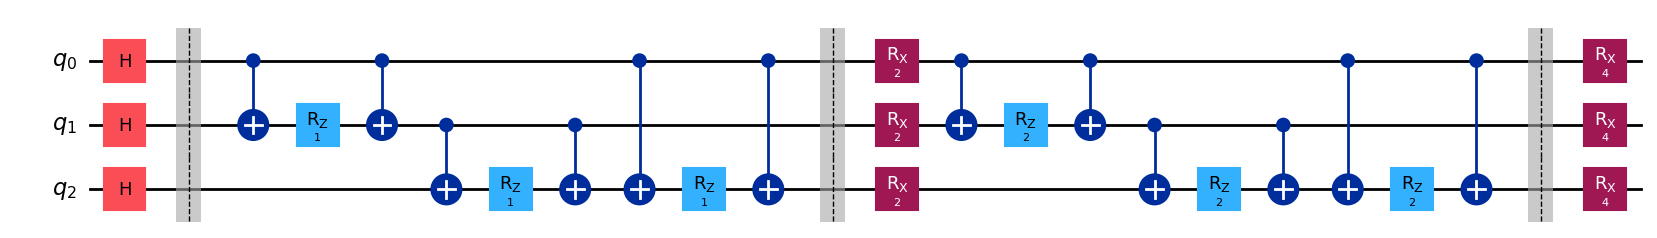

In [18]:
gamma = [1, 2]
beta = [1, 2]
nodes = [0, 1, 2]
edges = [(0, 1), (1, 2), (0, 2)]
p = 2

qc = qaoa_circuit_qiskit(gamma, beta, nodes, edges, p)
qc.draw('mpl')  # or qc.draw('text') for text-based output
